# Working with probability distributions

In [2]:
from scipy import stats
stats

<module 'scipy.stats' from '/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/__init__.py'>

In [44]:
die_distribution = stats.randint(1, 7)

die_distribution.rvs((10, 10))

array([[4, 5, 6, 1, 4, 2, 3, 2, 2, 3],
       [6, 2, 5, 4, 1, 3, 6, 4, 4, 1],
       [2, 3, 6, 2, 3, 2, 1, 1, 4, 4],
       [6, 1, 1, 2, 3, 1, 6, 4, 2, 6],
       [2, 1, 1, 3, 4, 1, 5, 6, 6, 1],
       [5, 4, 5, 2, 3, 3, 5, 4, 3, 1],
       [5, 3, 2, 3, 1, 2, 1, 2, 6, 3],
       [5, 6, 3, 3, 2, 6, 3, 3, 4, 4],
       [3, 5, 1, 2, 3, 6, 4, 5, 1, 3],
       [5, 4, 4, 6, 2, 2, 5, 5, 5, 6]])

In [45]:
die_distribution.pmf(4) # what's the likelihook we roll a 4?

0.16666666666666666

In [46]:
die_distribution.cdf(3) # what's the likelihook we roll a 3 or less?

0.5

In [92]:
stats.randint(1, 7).cdf(3)

0.5

In [49]:
# there's a 1 in 3 chance that we roll less than or equal to what?
die_distribution.ppf(1/3)

2.0

In [53]:
die_distribution.sf(2) + die_distribution.cdf(2)

1.0

In [54]:
die_distribution.isf(1/3) # There's a 1 in 3 chance our die roll is greater than what number?

4.0

In [61]:
stats.binom(8, .5).pmf(3)

0.21875000000000014

In [62]:
stats.binom(8, .5).sf(3)

0.6367187499999999

In [60]:
stats.binom(8, .5).rvs(100)

array([4, 5, 6, 6, 4, 5, 5, 4, 4, 6, 4, 5, 4, 3, 6, 6, 2, 3, 6, 2, 2, 5,
       4, 6, 3, 4, 5, 3, 3, 3, 4, 5, 2, 2, 5, 2, 4, 4, 3, 5, 4, 4, 5, 4,
       5, 5, 3, 4, 6, 4, 2, 3, 5, 4, 3, 4, 7, 6, 6, 4, 3, 1, 4, 3, 4, 3,
       3, 6, 4, 6, 6, 5, 2, 5, 4, 7, 3, 3, 3, 4, 5, 3, 5, 2, 2, 2, 6, 3,
       4, 2, 3, 6, 6, 2, 1, 4, 4, 5, 4, 2])

In [63]:
stats.binom(3, .7).pmf(0)

0.027000000000000007

In [64]:
stats.binom(5, .7).sf(0)

0.99757

In [65]:
stats.binom(5, .7).rvs(52)

array([4, 3, 4, 5, 3, 3, 4, 5, 5, 3, 3, 4, 4, 5, 4, 2, 5, 4, 5, 4, 4, 4,
       1, 3, 3, 3, 4, 2, 2, 4, 5, 4, 4, 3, 5, 2, 3, 2, 3, 3, 4, 4, 4, 3,
       5, 4, 2, 4, 3, 3, 4, 0])

> Suppose there is a 5% chance that a Codeup student will show up late to class. With a class of 20, what is the likelihood that everyone shows up on time?

"success" is showing up late

n = 20
p(sucess) = .05

P(0 successes, i.e. nobody is late)

In [66]:
stats.binom(20, .05).pmf(0)

0.3584859224085422

> Suppose that a store's daily sales are normally distributed with a mean of 12,000 dollars and standard deviation of 2000 dollars. How much would the daily sales have to be to be in the top 10% of all days?



In [68]:
# what's the likelihook we sell more than $10,000?
stats.norm(12000, 2000).sf(10000)

0.8413447460685429

In [69]:
# What's the cutoff point the determines whether a day is in the bottom 5% of all sales?
stats.norm(12_000, 2000).ppf(.05)

8710.292746097053

In [70]:
stats.norm(12_000, 2000).isf(.1)

14563.103131089201

In [71]:
stats.norm(12_000, 2000).ppf(.9)

14563.103131089201

Text(0, 0.5, 'P(X <= x)')

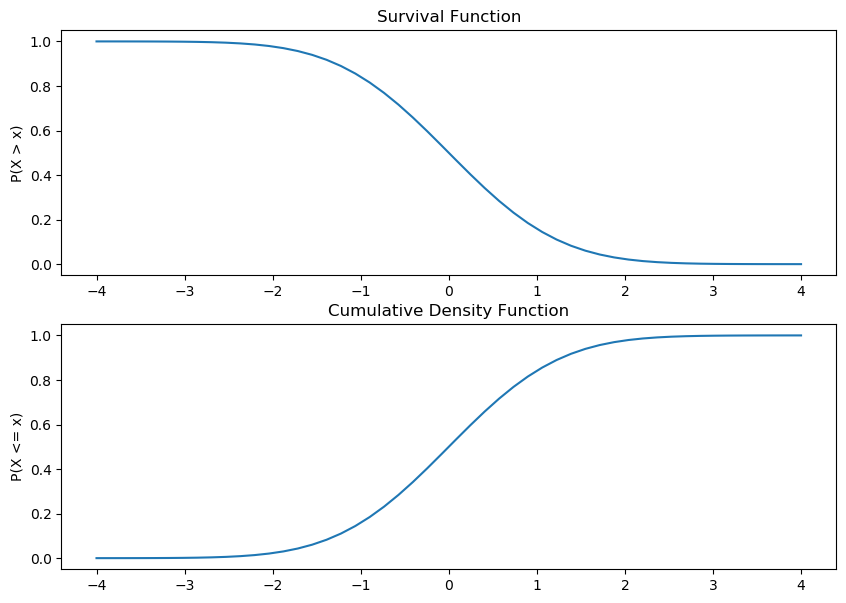

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-4, 4)
y1 = stats.norm.sf(x)
y2 = stats.norm.cdf(x)

fix, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7))

ax1.plot(x, y1)
ax1.set_title('Survival Function')
ax1.set_ylabel('P(X > x)')

ax2.plot(x, y2)
ax2.set_title('Cumulative Density Function')
ax2.set_ylabel('P(X <= x)')

> Suppose the average Codeup admissions phone call is 15 minutes long with a standard deviation of 3.

In [83]:
# how likely is it that a phone call will go on for 20 minutes or longer
stats.norm(15, 3).sf(20)

0.0477903522728147

In [85]:
1 - stats.norm(15, 3).cdf(20)

0.047790352272814696

In [86]:
# how quick does a phone call finish if it is in the bottom 25% of all phone calls?

In [87]:
stats.norm(15, 3).ppf(.25)

12.976530749411754

In [88]:
# 300 tacos / lunch

# how likely is it we sell only 200 (or fewer) tacos?
stats.poisson(300).cdf(200)

5.10497804862988e-10

In [89]:
# taco cutoff for top 10% of busiest lunches
stats.poisson(300).isf(.1)

322.0

In [90]:
stats.poisson(5).pmf(3)

0.1403738958142805

In [91]:
stats.poisson(5).sf(7)

0.13337167407000744